In [246]:
###importaciones
###aquí se hacen las importaciones necesarias para entrenar y crear los modelos, cada uno cumple una función.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import category_encoders
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import joblib
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import graphviz

import xgboost as xgb

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [247]:
##lectura del csv y objetos a usar
##Aquí se carga el archivo con los datos por medio de la librería Pandas, usando el comando read_csv, el cual es la extensión del archivo y a su vez se le agrega a una variable llamada data.
data=pd.read_csv('Historial_Decapado_Skp_8.csv')
##Aquí de asignan los objetos como label encoder y el árbol de decisiones a una variable con un nombre más corto, con el fin de hacer la programación más amena. 
le=LabelEncoder()
dt=DecisionTreeClassifier()
##Aquí sólo se llama a la variable data y al eecutarlo se mostrará su contenido. 
data

,Estatus,FECHA_ALTA,IdMaterial,NECESIDAD_ORIGEN,ACEROOrigen,C_ACEROOrigen,NECESIDAD_DESTINO,ACERODestino,C_ACERODestino,PRO_ORIGEN,...,EXTREMOSDestino,NORMADestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion,Pedido
0,OK,27-07-2016 10:36:54,2A318465GM200,3001014323,ACE520,CS,3001178885,ACE520,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
1,OK,22-12-2016 11:34:24,2A397918GD300,3001252680,ACE520,CS,3001337015,2060,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
2,OK,22-12-2016 11:34:23,2A397918GD300,3001252680,ACE520,CS,3001337015,2060,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
3,OK,17-10-2017 03:31:38,2A448115UD100,3001395287,ACE520,CS,3001621725,2060,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
4,OK,02-08-2016 15:45:11,2A375091GD200,3001187294,2060,CS,3001206107,ACE033,CS,MP509402,...,CORTADOS 98% EN ESPESOR,TER \ 1006 GAL (V 2011 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,Rechazado,24-03-2017 16:41:25,3A599109CD300,3001392804,06BTEP,DQ,3001324343,A05BC2,CS,MP530337,...,CORTADOS 98% EN ESPESOR,TER \ SPH270C (V 2012 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,AUTOMOTRIZ TROQUELADO,Rechazado,1
10724,Rechazado,09-06-2016 19:37:32,2A360053GS100,3001130070,ACE510,CS,3001163404,7094,HS,MP530481,...,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1
10725,OK,07-03-2016 17:47:56,2A287085GD302,3000969382,7094,HS,3001077256,ACE510,CS,MP530481,...,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1
10726,Rechazado,09-06-2016 19:37:34,2A360047GS100,3001130070,ACE510,CS,3001163404,7094,HS,MP530481,...,CORTADOS 98% EN ESPESOR,TER \ HSLA 45GLVG (V 2013 REV 1),ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado,1


In [248]:
###limpieza de datos
##Se crea una variable "de" la cual será llamada cuando se use el comando drop
##ésta variable contiene las columnas que no se utilizarán en el analítico. 
de=['Estatus', 'FECHA_ALTA', 'IdMaterial','C_ACERODestino','C_ACEROOrigen','CCLASEPRODTOOrigen','CCLASEPRODTODestino',
    'NECESIDAD_ORIGEN','NECESIDAD_DESTINO', 'PRO_ORIGEN', 'PRO_DESTINO', 'Pedido','ACEITADOOrigen','ACEITADODestino','NORMAOrigen','NORMADestino']
##Se crea una nueva variable para datos, se mete la variable data pero se le aplica el comando drop
##el cual en conjunto con la variable de desecahrá las columnas que contiene la variable. 
datac=data.drop(de,axis=1)
datac

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,SUPERFICIEOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,ACE520,ACE520,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
1,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
2,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
3,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
4,2060,ACE033,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,06BTEP,A05BC2,LAMINACION,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,...,LAMINACION,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,AUTOMOTRIZ TROQUELADO,Rechazado
10724,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado
10725,7094,ACE510,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado
10726,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,Rechazado


In [249]:
##Aquí se utiliza la función de pandas "dataframe" para convertir el csv a un dataframe de pandas.  
main_df=datac
main_df=pd.DataFrame(data=main_df)
print(main_df.head(10))

  ACEROOrigen ACERODestino BORDESOrigen  DIAM__INTERNOOrigen  \
0      ACE520       ACE520     CORTADOS                  610   
1      ACE520         2060     CORTADOS                  610   
2      ACE520         2060     CORTADOS                  610   
3      ACE520         2060     CORTADOS                  610   
4        2060       ACE033     CORTADOS                  610   
5        2060       ACE520     CORTADOS                  610   
6        2060       ACE520     CORTADOS                  610   
7        2060       ACE520     CORTADOS                  610   
8      C071TM       ACE001     CORTADOS                  610   
9      ACE520       ACE033     CORTADOS                  610   

            EXTREMOSOrigen   NORTOLANCHOOrigen     NORTOLESPESOROrigen  \
0  CORTADOS 98% EN ESPESOR  ASTM A 568 / A 635  1/2 ASTM A 568 / A 635   
1  CORTADOS 98% EN ESPESOR  ASTM A 568 / A 635  1/2 ASTM A 568 / A 635   
2  CORTADOS 98% EN ESPESOR  ASTM A 568 / A 635  1/2 ASTM A 568 / A 635   

In [250]:
## esto es solo para apoyarnos y sacar los nombres de las columnas.
main_df.columns

Index(['ACEROOrigen', 'ACERODestino', 'BORDESOrigen', 'DIAM__INTERNOOrigen',
       'EXTREMOSOrigen', 'NORTOLANCHOOrigen', 'NORTOLESPESOROrigen',
       'PLANITUDOrigen', 'SOLDAOrigen', 'SUPERFICIEOrigen', 'USOGRALOrigen',
       'BORDESDestino', 'DIAM__INTERNODestino', 'EXTREMOSDestino',
       'NORTOLANCHODestino', 'NORTOLESPESORDestino', 'PLANITUDDestino',
       'SOLDADestino', 'SUPERFICIEDestino', 'USOGRALDestino', 'Reasignacion'],
      dtype='object')

In [251]:
## aquí se utiliza le, el cual es Label Encoder (objeto que se asignó en el segundo bloque)
##y este lo utilizamos para encodificar la variable objetivo, por lo cual OK y RECHAZADO se convierten a 1 y 0
##pero esto es sólo el entrenamiento de ese objeto, por eso sólo se usa el comando fit.
encobj=le.fit(main_df['Reasignacion'])

In [252]:
###codificación de variable objetivo usando LE
##aquí ya se utiliza el comando transform para hacer la codificación
main_df.Reasignacion=encobj.transform(main_df['Reasignacion'])
## al aplicarse sobre la misma variable que contenía el dataframe 
## obtenemos que la columna de Reasignación (variable objetivo) ahora está codificada en 1 y 0.
main_df

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,SUPERFICIEOrigen,...,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino,Reasignacion
0,ACE520,ACE520,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
1,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
2,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
3,ACE520,2060,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
4,2060,ACE033,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALV. INDUSTRIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,06BTEP,A05BC2,LAMINACION,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,...,LAMINACION,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM ESTANDAR,NO,SEMI-EXPUESTA,AUTOMOTRIZ TROQUELADO,1
10724,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,1
10725,7094,ACE510,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,1
10726,ACE510,7094,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,...,CORTADOS,610,CORTADOS 98% EN ESPESOR,ASTM A 568 / A 635,1/2 ASTM A 568 / A 635,TERNIUM CONTROLADA,NO,SEMI-EXPUESTA,GALVANIZADO,1


In [253]:
##Aquí se crea un .pkl (el cual es como un ejecutable) con el encodificado entrenado para un uso futuro. 
joblib.dump(encobj,'EncodificacionObjetivo.pkl')

['EncodificacionObjetivo.pkl']

In [254]:
###Variable objetivo
##aquí separamos la variable objetivo y creamos un data frame a partir de ella.
target_df = pd.DataFrame(main_df, columns=['Reasignacion'])
print(target_df.sample(10))

      Reasignacion
8697             0
4510             0
1473             0
3442             0
4933             0
6696             0
4377             0
3674             0
8149             0
916              0


In [255]:
##creación de dataset encodificado
## Como ya se creo un data frame con la variable objetivo 
##ésta se eliminará del dataframe que contienen los datos para el analítico. 
main_df=main_df.drop(['Reasignacion'],axis=1)


In [256]:
####encodifiación de atributos usando target
##Ahora usando Target encoder, dentro de una variable llamada enc, encodificamos los datos del analítico
##introduciendo las columnas a codificar, poniendo los argumentos como handle_unknown 
##para que los valores desconocidos no sean un problema. 
##y al final se introduce el fit para entrenar al codificador con el main df como eje X (datos)
##y el target df como eje Y(objetivo).
main_df.columns = main_df.columns.str.strip()
target_df.columns = target_df.columns.str.strip()
enc=category_encoders.target_encoder.TargetEncoder(verbose=0,cols=[ 'ACEROOrigen','BORDESOrigen','DIAM__INTERNOOrigen','EXTREMOSOrigen',
                       'NORTOLANCHOOrigen','NORTOLESPESOROrigen','PLANITUDOrigen','SOLDAOrigen','SUPERFICIEOrigen','USOGRALOrigen',       
                        'ACERODestino','BORDESDestino','DIAM__INTERNODestino',
                      'EXTREMOSDestino','NORTOLANCHODestino','NORTOLESPESORDestino','PLANITUDDestino','SOLDADestino',
                      'SUPERFICIEDestino','USOGRALDestino']
                                                   ,drop_invariant=False, return_df=True, handle_unknown='value',handle_missing='value',min_samples_leaf=1,smoothing=1.0).fit(main_df,target_df)

In [257]:
##aquí se crea el primer pkl que necesitaremos en cada modelo, y es un pkl de la codificación de los datos de entrenamiento
##para utilizar la misma encodificación en cada análisis de nuevos datos.
joblib.dump(enc,'TargetDecapado.pkl')

['TargetDecapado.pkl']

In [258]:
##usamos la variable enc con el comando transform para codificar el maindf 
##y que los datos sean números, de tal forma que el algoritmo pueda entender todo.
codi=enc.transform(main_df)
codi

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,SUPERFICIEOrigen,USOGRALOrigen,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.022785,0.021277,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
1,0.022785,0.061381,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
2,0.022785,0.061381,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
3,0.022785,0.061381,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
4,0.075472,0.000000,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0.193548,0.387755,0.109991,0.102066,0.102629,0.102915,0.094607,0.021739,0.102629,0.12201,0.069930,0.110524,0.101162,0.102629,0.104265,0.091111,0.042105,0.102629,0.123091,0.037594
10724,0.542683,0.250000,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10725,0.100000,0.404762,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10726,0.542683,0.250000,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624


In [259]:
###declaración de variable x (atributos)
##aquí sólo se crea X con los datos ya convertidos.
X=codi
X

,ACEROOrigen,ACERODestino,BORDESOrigen,DIAM__INTERNOOrigen,EXTREMOSOrigen,NORTOLANCHOOrigen,NORTOLESPESOROrigen,PLANITUDOrigen,SOLDAOrigen,SUPERFICIEOrigen,USOGRALOrigen,BORDESDestino,DIAM__INTERNODestino,EXTREMOSDestino,NORTOLANCHODestino,NORTOLESPESORDestino,PLANITUDDestino,SOLDADestino,SUPERFICIEDestino,USOGRALDestino
0,0.022785,0.021277,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
1,0.022785,0.061381,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
2,0.022785,0.061381,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
3,0.022785,0.061381,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
4,0.075472,0.000000,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.075630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,0.193548,0.387755,0.109991,0.102066,0.102629,0.102915,0.094607,0.021739,0.102629,0.12201,0.069930,0.110524,0.101162,0.102629,0.104265,0.091111,0.042105,0.102629,0.123091,0.037594
10724,0.542683,0.250000,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10725,0.100000,0.404762,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624
10726,0.542683,0.250000,0.091105,0.102066,0.102629,0.102915,0.094607,0.103328,0.102629,0.12201,0.122715,0.089890,0.101162,0.102629,0.104265,0.091111,0.103169,0.102629,0.123091,0.119624


In [260]:
###declaración de y (objetivo)
##Aquí se crea Y con los datos objetivo codificados.
y=target_df
y

,Reasignacion
0,0
1,0
2,0
3,0
4,0
...,...
10723,1
10724,1
10725,1
10726,1


In [261]:
##división de datos 
##Se utiliza la función train_test_split con las variables anteriormente creadas(X,y) para hacer una división aleatoria de los datos de tal forma que unos se usen para apreder y otros para hacer una especie de examen y comprobar que tan bien aprendió el modelo
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [262]:
##entrenamiento
##se utiliza la variable dt (el arbol de decisiones) con el comando fit para entrenarlo, usando X_train & y_train.
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [263]:
dt.score(X_train,y_train)

0.9817300521998509

In [264]:
###prueba score
##Se prueba el aprendizaje del modelo con la función score y las variables X_test & y_test (Examen)
dt.score(X_test,y_test)

0.9604772557792692

In [265]:
##Para finalizar se crea el segundo PKL que se usará en cada modelo, y éste es el pkl del árbol de decisiones ya entrenado en éste proceso de reasignación. de tal manera que por cada proceso de reasignación tendremos 2 pkl, uno para encodificar y otro para analizar los datos y hacer las predicciones. 
joblib.dump(dt,'ModeloDecapado.pkl')

['ModeloDecapado.pkl']

In [266]:
##Se crea una variable con los nombres de las variables objetivo
nombres=['OK','RECHAZADO']

In [267]:
##exportación y render
##Usando graphviz  podemos exportar el modelo que creamos como un pdf para así visualizarlo, esto es un paso extra y no es necesario para crear o modificar el modelo, sin embargo, te da una perspectiva de qué se creó. 
dot_data=export_graphviz(dt,feature_names= X.columns, class_names=nombres, impurity=False, filled=True)
graph=graphviz.Source(dot_data)

graph.render('ModeloDecapado')

'ModeloDecapado.pdf'

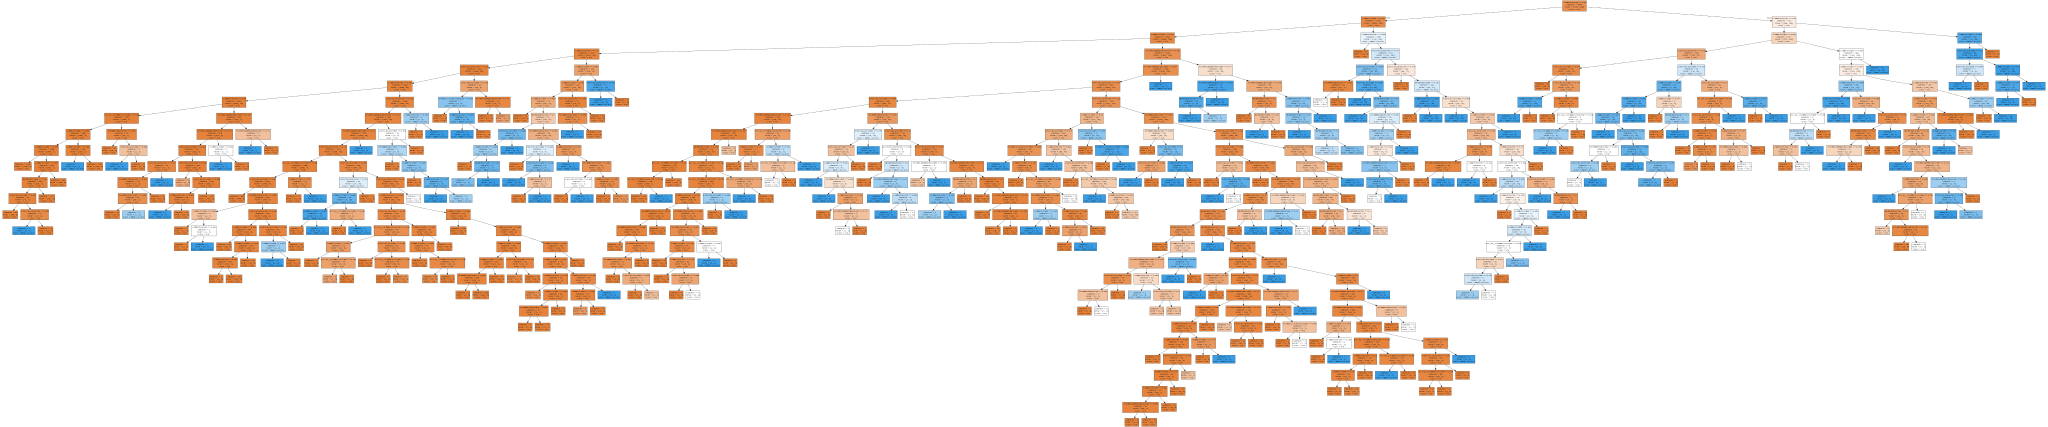

In [268]:
graphviz.Source(dot_data)

Text(0.5, 0, 'Importancia')

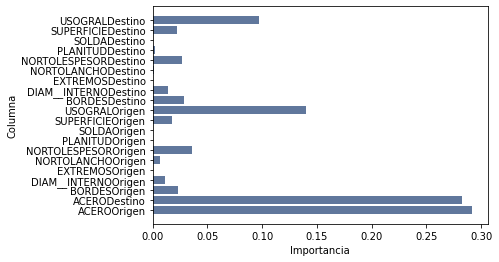

In [269]:
carac=main_df.shape[1]
plt.barh(range(carac),dt.feature_importances_)
plt.yticks(np.arange(carac),X.columns)
plt.ylabel('Columna')
plt.xlabel('Importancia')

In [270]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, 
                        target_df, random_state=1)

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.902/0.904


In [271]:
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [272]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  0.980/0.959


In [273]:
# Armando el modelo con parametro max_depth
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
# Ajustando el modelo
gbrt.fit(X_train, y_train)
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Precisión Gradient Boosting train/test  0.908/0.904
